## Extended Pandas Example

This is taken almost verbatim from [Jake Vanderplas' Github](https://raw.githubusercontent.com/jakevdp/OsloWorkshop2014/master/notebooks/01.2_NumpyPandas.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Following is optional: set plotting styles
import seaborn; seaborn.set()

## Example: Names in the Wild

This example is drawn from Wes McKinney's excellent book on the *Pandas* library, O'Reilly's [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

We'll be taking a look at a freely available dataset: the database of names given to babies in the United States over the last century.

First things first, we need to download the data, which can be found at http://www.ssa.gov/oact/babynames/limits.html.
If you uncomment the following commands, it will do this automatically (note that these are linux shell commands; they will not work on Windows):

In [2]:
!curl -O http://www.ssa.gov/oact/babynames/names.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7687k  100 7687k    0     0  1637k      0  0:00:04  0:00:04 --:--:-- 1637k


In [3]:
!mkdir -p data/names
!mv names.zip data/names/
!cd data/names/ && unzip names.zip

Archive:  names.zip
  inflating: yob1880.txt             
  inflating: yob1881.txt             
  inflating: yob1882.txt             
  inflating: yob1883.txt             
  inflating: yob1884.txt             
  inflating: yob1885.txt             
  inflating: yob1886.txt             
  inflating: yob1887.txt             
  inflating: yob1888.txt             
  inflating: yob1889.txt             
  inflating: yob1890.txt             
  inflating: yob1891.txt             
  inflating: yob1892.txt             
  inflating: yob1893.txt             
  inflating: yob1894.txt             
  inflating: yob1895.txt             
  inflating: yob1896.txt             
  inflating: yob1897.txt             
  inflating: yob1898.txt             
  inflating: yob1899.txt             
  inflating: yob1900.txt             
  inflating: yob1901.txt             
  inflating: yob1902.txt             
  inflating: yob1903.txt             
  inflating: yob1904.txt             
  inflating: yob1905.txt      

Now we should have a ``data/names`` directory which contains a number of text files, one for each year of data:

In [4]:
!ls data/names

NationalReadMe.pdf yob1913.txt        yob1948.txt        yob1983.txt
names.zip          yob1914.txt        yob1949.txt        yob1984.txt
yob1880.txt        yob1915.txt        yob1950.txt        yob1985.txt
yob1881.txt        yob1916.txt        yob1951.txt        yob1986.txt
yob1882.txt        yob1917.txt        yob1952.txt        yob1987.txt
yob1883.txt        yob1918.txt        yob1953.txt        yob1988.txt
yob1884.txt        yob1919.txt        yob1954.txt        yob1989.txt
yob1885.txt        yob1920.txt        yob1955.txt        yob1990.txt
yob1886.txt        yob1921.txt        yob1956.txt        yob1991.txt
yob1887.txt        yob1922.txt        yob1957.txt        yob1992.txt
yob1888.txt        yob1923.txt        yob1958.txt        yob1993.txt
yob1889.txt        yob1924.txt        yob1959.txt        yob1994.txt
yob1890.txt        yob1925.txt        yob1960.txt        yob1995.txt
yob1891.txt        yob1926.txt        yob1961.txt        yob1996.txt
yob1892.txt        yob1927.txt    

Let's take a quick look at one of these files:

In [5]:
!head data/names/yob1880.txt

Each file is just a comma-separated list of names, genders, and counts of babies with that name in each year.

We can load these files using ``pd.read_csv``, which is specifically designed for this:

In [6]:
names1880 = pd.read_csv('data/names/yob1880.txt',
                        names=['name', 'gender', 'births'])
names1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


### GroupBy: aggregates on values

In [7]:
# Pedestrian counting of number of male and female births
males = names1880[names1880.gender == 'M']
females = names1880[names1880.gender == 'F']
males.births.sum(), females.births.sum()

(110491, 90993)

In [8]:
# Pandas provides a better way
grouped = names1880.groupby('gender')
grouped

This grouped object is now an abstract representation of the data, where the data is split on the given column.
In order to actually do something with this data, we need to specify an **aggregation** operation to do across the data.
In this case, what we want is the sum:

In [9]:
grouped.sum()

,births
gender,
F,90993
M,110491


We can do other aggregations as well:

In [10]:
grouped.size()

gender
F     942
M    1058
dtype: int64

In [11]:
grouped.mean()

,births
gender,
F,96.595541
M,104.433837


Or, if we wish, we can get a description of the grouping:

In [12]:
grouped.describe()

births
gender                   
F      count   942.000000
       mean     96.595541
       std     328.152904
       min       5.000000
       25%       7.000000
       50%      13.000000
       75%      43.750000
       max    7065.000000
M      count  1058.000000
       mean    104.433837
       std     561.232488
       min       5.000000
       25%       7.000000
       50%      12.000000
       75%      41.000000
       max    9655.000000

### Concatenating multiple data sources

But here we've just been looking at a single year. Let's try to put together all the data in all the years.
To do this, we'll have to use pandas ``concat`` function to concatenate all the data together.
First we'll create a function which loads the data as we did the above data:

In [13]:
def load_year(year):
    data = pd.read_csv('data/names/yob{0}.txt'.format(year),
                       names=['name', 'gender', 'births'])
    data['year'] = year
    return data

Now let's load all the data into a list, and call ``pd.concat`` on that list:

In [14]:
names = pd.concat([load_year(year) for year in range(1880, 2014)])
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


It looks like we've done it!

Let's start with something easy: we'll use ``groupby`` again to see the total number of births per year:

In [15]:
births = names.groupby('year').births.sum()
births.head()

year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: births, dtype: int64

We can use the ``plot()`` method to see a quick plot of these (note that because we used the ``%matplotlib inline`` magic at the start of the notebook, the resulting plot will be shown inline within the notebook).

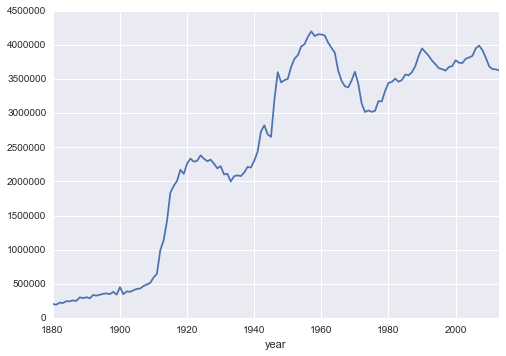

In [16]:
births.plot();

The so-called "baby boom" generation after the second world war is abundantly clear!

We can also use other aggregates: let's see *how many* names are used each year:

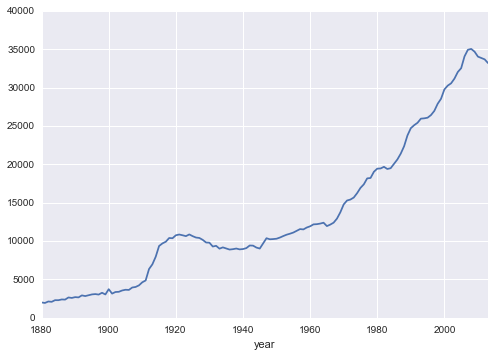

In [17]:
names.groupby('year').births.count().plot();

Apparently there's been a huge increase of the diversity of names with time!

``groupby`` can also be used to add columns to the data: think of it as a *view* of the data that you're modifying. Let's add a column giving the frequency of each name within each year & gender:

In [18]:
def add_frequency(group):
    group['birth_freq'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'gender']).apply(add_frequency)
names.head()

,name,gender,births,year,birth_freq
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Notice that the ``apply()`` function iterates over each group, and calls a function which modifies the group.
This result is then re-constructed into a container which looks ike the original dataframe.

### Pivot Tables

Next we'll discuss Pivot Tables, which are an even more powerful way of (re)organizing your data.

Let's say that we want to plot the men and women separately.
We could do this by using masking, as follows:

In [19]:
men = names[names.gender == 'M']
women = names[names.gender == 'W']

And then we could proceed as above, using ``groupby`` to group on the year.
But we would end up with two different views of the data. A better way to do this is to use a ``pivot_table``, which is essentially a groupby in multiple dimensions at once:

In [20]:
births = names.pivot_table('births',
                           index='year', columns='gender',
                           aggfunc=sum)
births.head()

gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


Note that this has grouped the index by the value of ``year``, and grouped the columns by the value of ``gender``.
Let's plot the results now:

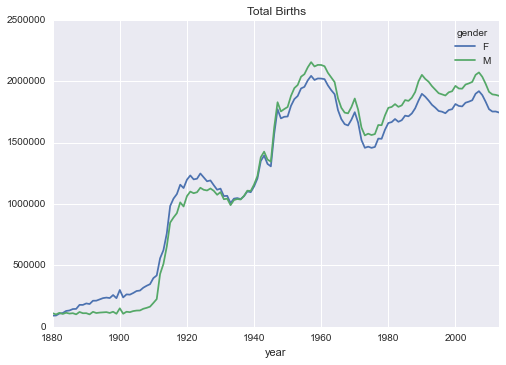

In [21]:
births.plot(title='Total Births');

### Name Evolution Over Time

Some names have shifted from being girls names to being boys names. Let's take a look at some of these:

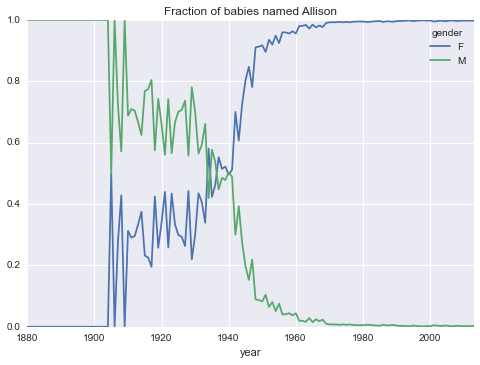

In [22]:
names_to_check = ['Allison', 'Alison']

# filter on just the names we're interested in
births = names[names.name.isin(names_to_check)]

# pivot table to get year vs. gender
births = births.pivot_table('births', index='year', columns='gender')

# fill all NaNs with zeros
births = births.fillna(0)

# normalize along columns
births = births.div(births.sum(1), axis=0)

births.plot(title='Fraction of babies named Allison');

We can see that prior to about 1905, all babies named Allison were male. Over the 20th century, this reversed, until the end of the century nearly all Allisons were female!

There's some noise in this data: we can smooth it out a bit by using a 5-year rolling mean:

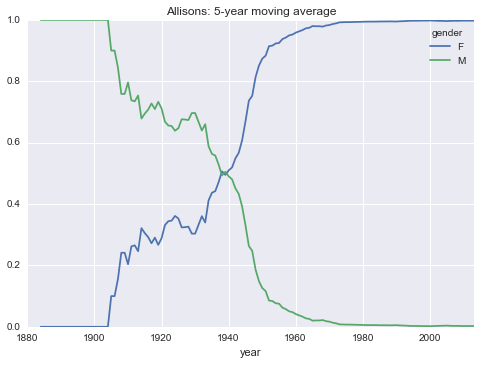

In [23]:
pd.rolling_mean(births, 5).plot(title="Allisons: 5-year moving average");

This gives a smoother picture of the transition, and is an example of the bias/variance tradeoff that we'll often see in modeling: a smoother model has less variance (variation due to sampling or other noise) but at the expense of more bias (the model systematically mis-represents the data slightly).

## Where to Find More

We've just scratched the surface of what can be done with Pandas, but we'll get a chance to play with this more in the breakout session coming up.

For more information on using Pandas, check out the [pandas documentation](http://pandas.pydata.org/) or the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Pandas creator Wes McKinney.